In [19]:
import pandas as pd
import numpy as np
import os 
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(os.path.join('data', 'set-a', '132539.txt'), sep=',')
df['Time'] = pd.to_timedelta(df['Time'] + ":00")
df['Time'] = pd.to_timedelta(np.ceil(df['Time'].dt.total_seconds() / 3600) * 3600, unit='s')
df

,Time,Parameter,Value
0,0 days,RecordID,132539.00
1,0 days,Age,54.00
2,0 days,Gender,0.00
3,0 days,Height,-1.00
4,0 days,ICUType,4.00
...,...,...,...
268,2 days,NIMAP,79.33
269,2 days,NISysABP,128.00
270,2 days,RespRate,23.00
271,2 days,Temp,37.80


In [5]:
fixed_parameters = ["RecordID", "Age", "Weight", "Gender", "Height"]
fixed_values = df[df["Parameter"].isin(fixed_parameters)].set_index("Parameter")["Value"].to_dict()
fixed_values

{'RecordID': 132539.0,
 'Age': 54.0,
 'Gender': 0.0,
 'Height': -1.0,
 'Weight': -1.0}

In [6]:
df.drop(df[df["Parameter"].isin(fixed_parameters + ["ICUType"])].index, inplace=True)
df

,Time,Parameter,Value
6,0 days 01:00:00,GCS,15.00
7,0 days 01:00:00,HR,73.00
8,0 days 01:00:00,NIDiasABP,65.00
9,0 days 01:00:00,NIMAP,92.33
10,0 days 01:00:00,NISysABP,147.00
...,...,...,...
268,2 days 00:00:00,NIMAP,79.33
269,2 days 00:00:00,NISysABP,128.00
270,2 days 00:00:00,RespRate,23.00
271,2 days 00:00:00,Temp,37.80


In [7]:
df_pivot = pd.pivot_table(df, index=['Time'], columns='Parameter', values='Value', aggfunc='first').reset_index()
df_pivot

Parameter,Time,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,NIDiasABP,NIMAP,NISysABP,Na,Platelets,RespRate,Temp,Urine,WBC
0,0 days 01:00:00,NaN,NaN,15.0,NaN,NaN,NaN,73.0,NaN,NaN,65.0,92.33,147.0,NaN,NaN,19.0,35.1,900.0,NaN
1,0 days 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,62.0,87.00,137.0,NaN,NaN,18.0,NaN,30.0,NaN
2,0 days 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,52.0,75.67,123.0,NaN,NaN,19.0,NaN,170.0,NaN
3,0 days 04:00:00,NaN,NaN,15.0,NaN,NaN,33.7,80.0,NaN,NaN,52.0,72.67,114.0,NaN,NaN,20.0,37.8,60.0,NaN
4,0 days 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
5,0 days 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,45.0,66.67,110.0,NaN,NaN,17.0,NaN,170.0,NaN
6,0 days 08:00:00,NaN,NaN,15.0,NaN,NaN,NaN,64.0,NaN,NaN,49.0,68.33,107.0,NaN,NaN,15.0,38.1,120.0,NaN
7,0 days 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,56.0,71.33,102.0,NaN,NaN,14.0,NaN,80.0,NaN
8,0 days 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,48.0,70.00,114.0,NaN,NaN,17.0,NaN,100.0,NaN
9,0 days 11:00:00,13.0,0.8,NaN,205.0,26.0,33.5,61.0,4.4,1.5,62.0,77.67,109.0,137.0,221.0,15.0,NaN,60.0,11.2


In [8]:
for param, value in fixed_values.items():
    df_pivot[param] = value
df_pivot

Parameter,Time,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,...,Platelets,RespRate,Temp,Urine,WBC,RecordID,Age,Gender,Height,Weight
0,0 days 01:00:00,NaN,NaN,15.0,NaN,NaN,NaN,73.0,NaN,NaN,...,NaN,19.0,35.1,900.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
1,0 days 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,...,NaN,18.0,NaN,30.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
2,0 days 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,...,NaN,19.0,NaN,170.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
3,0 days 04:00:00,NaN,NaN,15.0,NaN,NaN,33.7,80.0,NaN,NaN,...,NaN,20.0,37.8,60.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
4,0 days 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,132539.0,54.0,0.0,-1.0,-1.0
5,0 days 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,...,NaN,17.0,NaN,170.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
6,0 days 08:00:00,NaN,NaN,15.0,NaN,NaN,NaN,64.0,NaN,NaN,...,NaN,15.0,38.1,120.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
7,0 days 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,...,NaN,14.0,NaN,80.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
8,0 days 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,17.0,NaN,100.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
9,0 days 11:00:00,13.0,0.8,NaN,205.0,26.0,33.5,61.0,4.4,1.5,...,221.0,15.0,NaN,60.0,11.2,132539.0,54.0,0.0,-1.0,-1.0


In [9]:
for file in os.listdir(os.path.join('data', 'set-a')):
    if file.endswith('.txt'):
        df = pd.read_csv(os.path.join('data', 'set-a', file), sep=',')

In [10]:
def process_file(file_path):
    """
    Reads and processes a single txt file and returns a pivoted DataFrame.
    """
    # Read file and parse CSV data
    df = pd.read_csv(file_path, sep=',')
    
    # Convert 'Time' column: append ":00", convert to timedelta, then round up to the next hour.
    df['Time'] = pd.to_timedelta(df['Time'] + ":00")
    df['Time'] = pd.to_timedelta(np.ceil(df['Time'].dt.total_seconds() / 3600) * 3600, unit='s')
    
    # Define fixed parameters and extract their constant values
    fixed_parameters = ["RecordID", "Age", "Weight", "Gender", "Height", "ICUType"]
    fixed_values = df[df["Parameter"].isin(fixed_parameters)].set_index("Parameter")["Value"].to_dict()
    
    # Drop rows corresponding to fixed parameters and ICUType as they're not needed for pivoting
    df = df[~df["Parameter"].isin(fixed_parameters)]
    
    # Pivot the DataFrame so that each time point becomes a row and Parameters become columns
    df_pivot = pd.pivot_table(df, index=['Time'], columns='Parameter', values='Value', aggfunc='first').reset_index()
    
    # Add fixed values (e.g. RecordID, Age, etc.) as constant columns in each pivoted DataFrame
    for param, value in fixed_values.items():
        df_pivot[param] = value
        
    columns_order = ['Time'] + fixed_parameters + [col for col in df_pivot.columns if col not in ['Time'] + fixed_parameters]
    return df_pivot[columns_order]

In [11]:
def combine_files_in_folder(folder_path):
    """
    Processes all .txt files in the specified folder and combines the results into one DataFrame.
    """
    # Get list of all txt files in the folder
    all_files = os.listdir(folder_path)
    all_dfs = []
    
    for file in all_files:
        processed_df = process_file(os.path.join(folder_path, file))
        all_dfs.append(processed_df)
    
    # Concatenate all processed DataFrames into one final DataFrame
    combined_df = pd.concat(all_dfs, ignore_index=True)
    return combined_df

In [12]:
patient_df = combine_files_in_folder(os.path.join('data', 'set-a'))
patient_df

Parameter,Time,RecordID,Age,Weight,Gender,Height,ICUType,BUN,Creatinine,GCS,...,pH,ALP,ALT,AST,Albumin,Bilirubin,Lactate,Cholesterol,TroponinI,TroponinT
0,0 days 01:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 days 02:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0 days 03:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0 days 04:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0 days 05:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179501,1 days 20:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,NaN,...,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179502,1 days 21:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179503,1 days 22:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,14.0,...,7.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179504,1 days 23:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
outcomes_df = pd.read_csv(os.path.join('data', 'Outcomes-a.txt'), sep=',')
outcomes_df

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,6,1,5,-1,0
1,132540,16,8,8,-1,0
2,132541,21,11,19,-1,0
3,132543,7,1,9,575,0
4,132545,17,2,4,918,0
...,...,...,...,...,...,...
3995,142665,19,7,10,336,0
3996,142667,8,2,3,-1,0
3997,142670,8,5,11,-1,0
3998,142671,22,10,8,7,1


In [15]:
patient_df.columns

Index(['Time', 'RecordID', 'Age', 'Weight', 'Gender', 'Height', 'ICUType',
       'BUN', 'Creatinine', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Mg',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'Platelets', 'RespRate', 'Temp',
       'Urine', 'WBC', 'DiasABP', 'FiO2', 'MAP', 'MechVent', 'PaCO2', 'PaO2',
       'SaO2', 'SysABP', 'pH', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin',
       'Lactate', 'Cholesterol', 'TroponinI', 'TroponinT'],
      dtype='object', name='Parameter')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179506 entries, 0 to 179505
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   Time         179506 non-null  timedelta64[ns]
 1   RecordID     179506 non-null  float64        
 2   Age          179506 non-null  float64        
 3   Weight       179506 non-null  float64        
 4   Gender       179506 non-null  float64        
 5   Height       179506 non-null  float64        
 6   ICUType      179506 non-null  float64        
 7   BUN          13889 non-null   float64        
 8   Creatinine   13955 non-null   float64        
 9   GCS          61070 non-null   float64        
 10  Glucose      12991 non-null   float64        
 11  HCO3         13583 non-null   float64        
 12  HCT          18177 non-null   float64        
 13  HR           172979 non-null  float64        
 14  K            14407 non-null   float64        
 15  Mg           1357

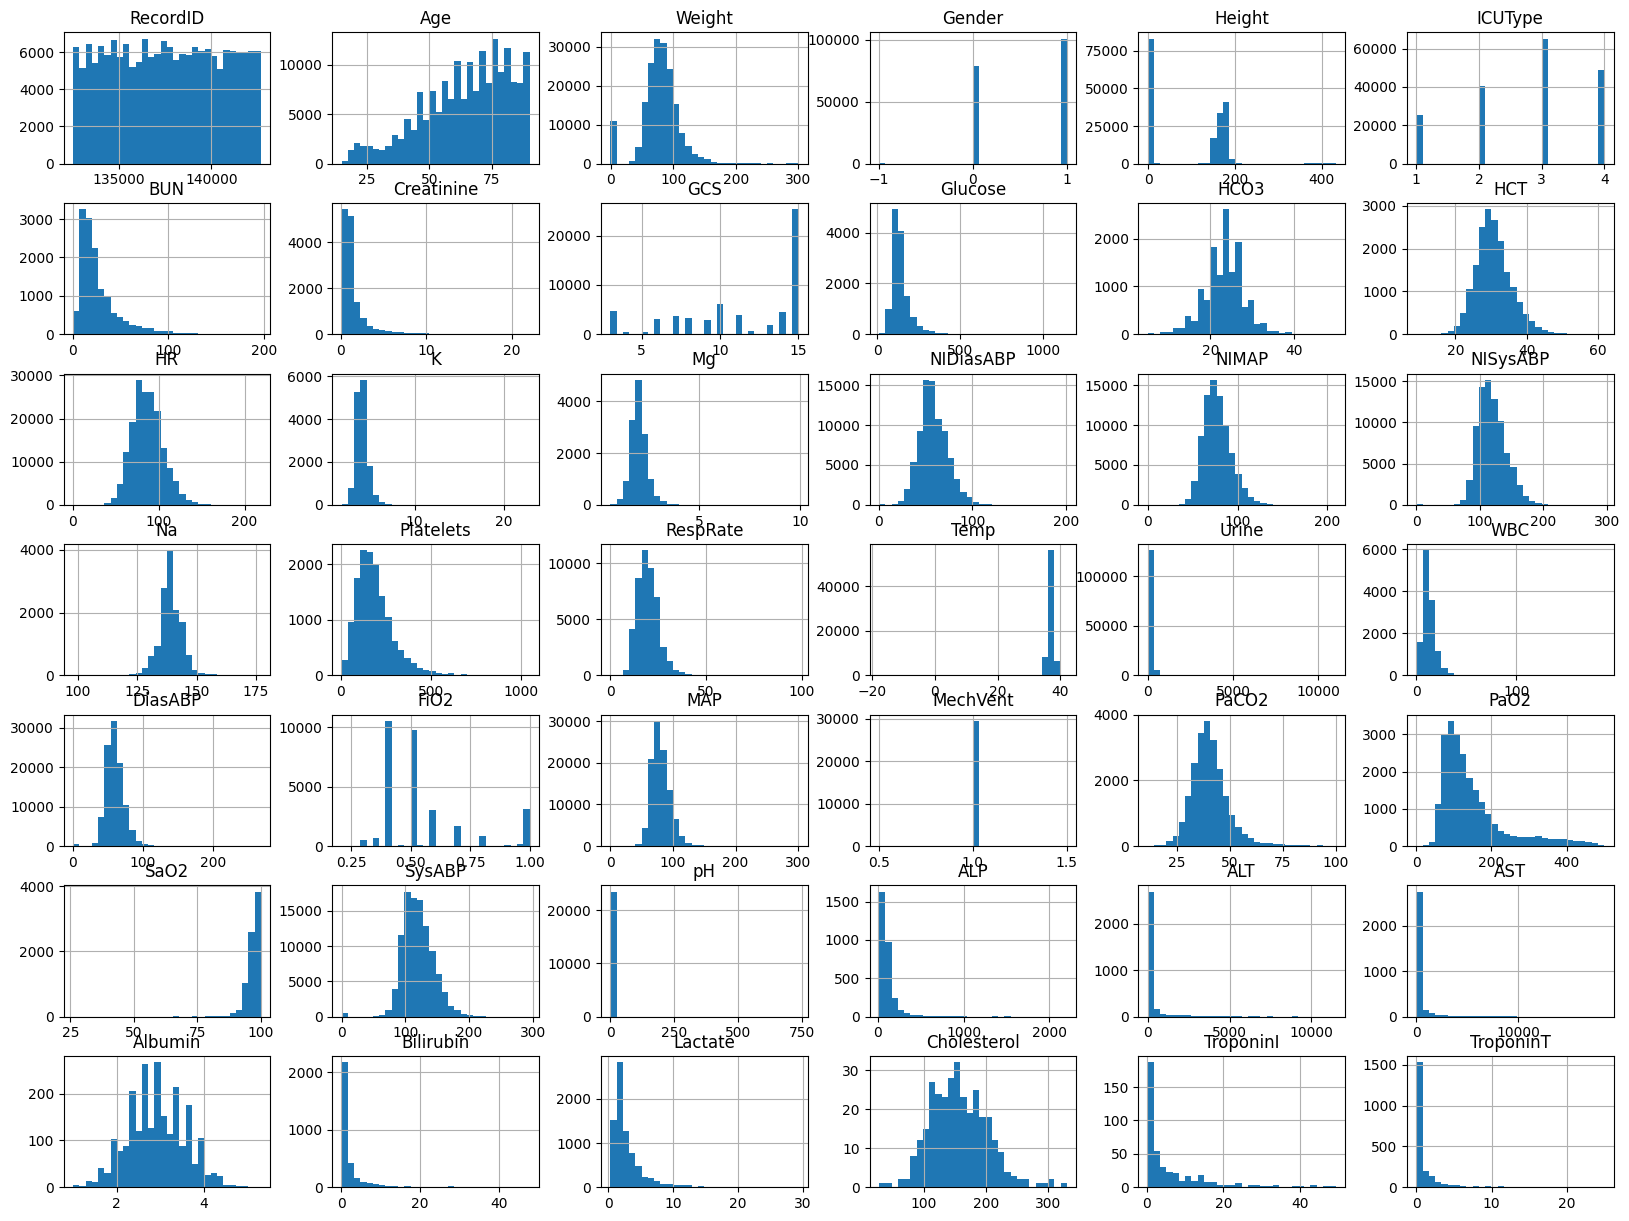

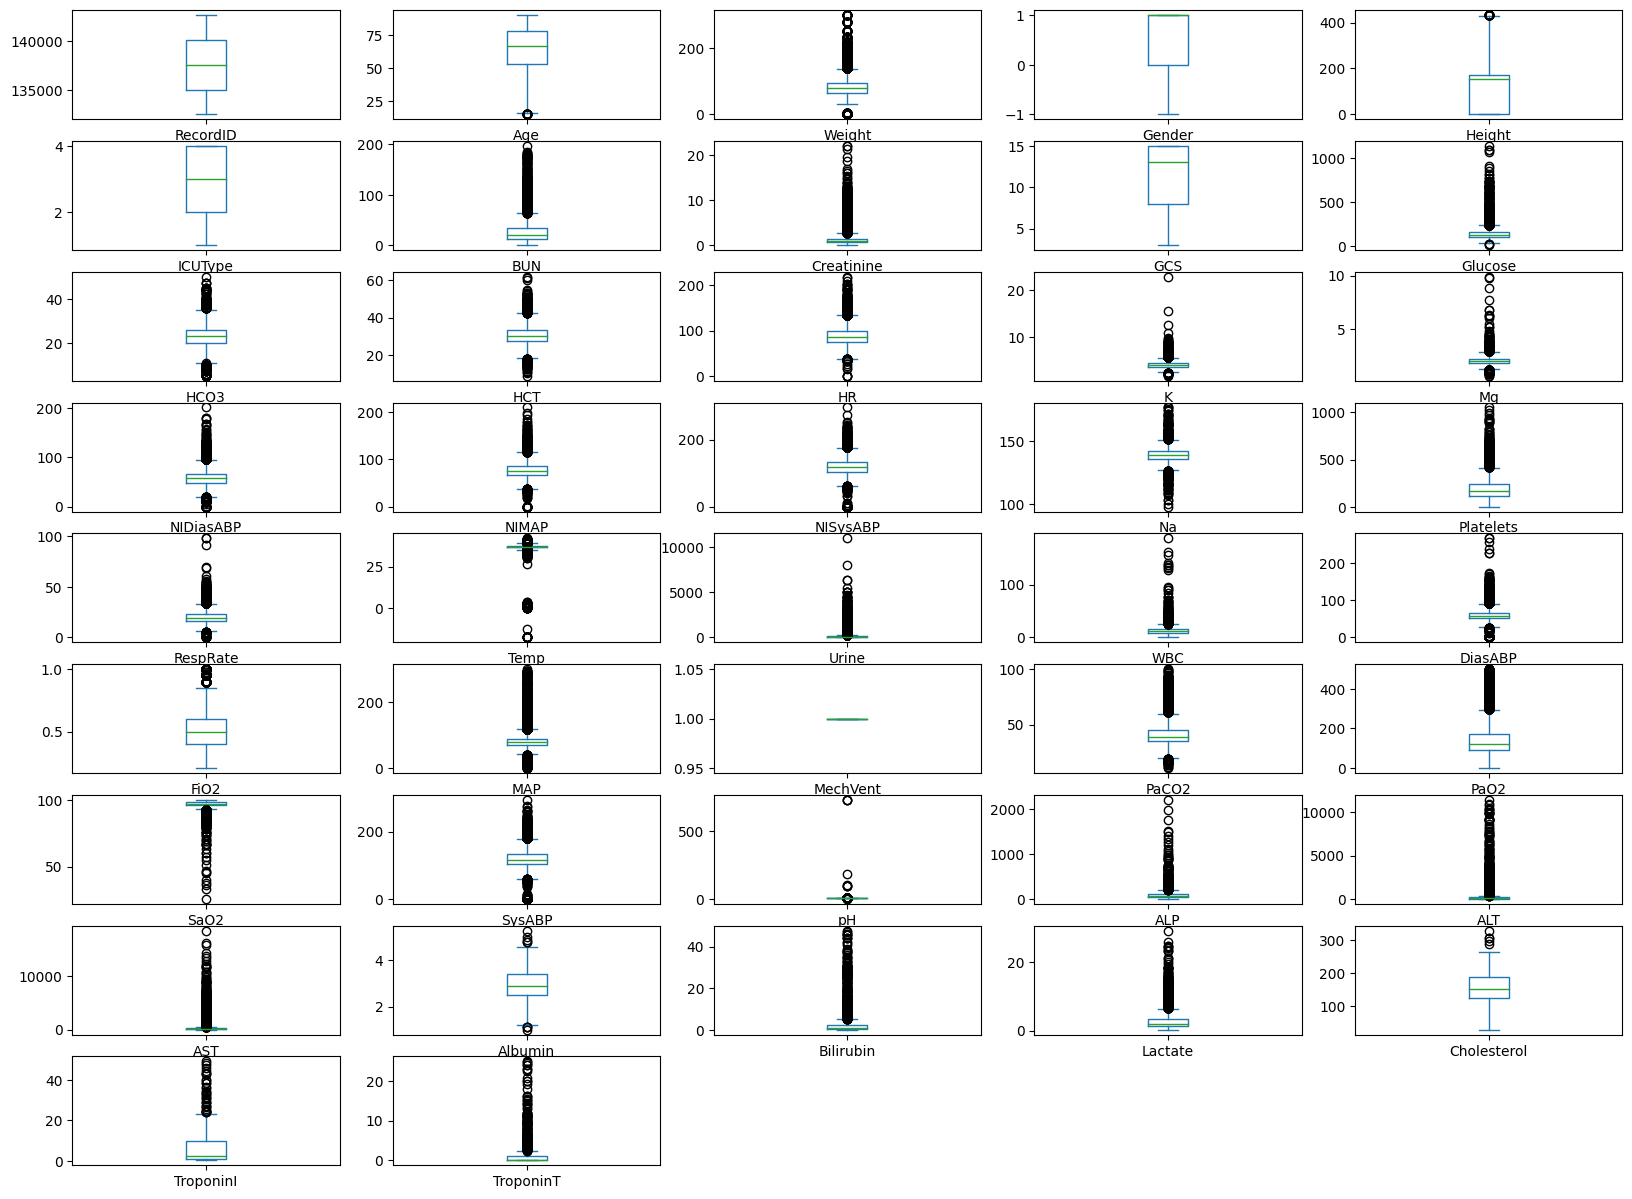

Categorical columns: Index([], dtype='object', name='Parameter')


In [ ]:
# Load the data into a DataFrame
# Assuming patient_df is already loaded, otherwise use pd.read_csv or similar method to load it

# Display basic information about the DataFrame
print(patient_df.info())

# Display descriptive statistics
print(patient_df.describe())

# Plot histograms for each numerical column
patient_df.hist(bins=30, figsize=(20, 15))
plt.show()

# Plot boxplots for each numerical column to check for outliers
num_columns = len(patient_df.select_dtypes(include=['number']).columns)
layout = (math.ceil(num_columns / 5), 5)
patient_df.plot(kind='box', subplots=True, layout=layout, figsize=(20, 15))
plt.show()

# Check for categorical data
categorical_columns = patient_df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

# Plot count plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=patient_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

Observations: Way more Gender "1" 
Age: In general more older population which makes sense
ICUType: 3 is the far majority 

## 1.3 Preprocessing

In [34]:
#patient_df.to_parquet('patient_data.parquet')
patient_df = pd.read_parquet('patient_data.parquet', engine='fastparquet')

In [35]:
patient_df.columns

Index(['Time', 'RecordID', 'Age', 'Weight', 'Gender', 'Height', 'ICUType',
       'BUN', 'Creatinine', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Mg',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'Platelets', 'RespRate', 'Temp',
       'Urine', 'WBC', 'DiasABP', 'FiO2', 'MAP', 'MechVent', 'PaCO2', 'PaO2',
       'SaO2', 'SysABP', 'pH', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin',
       'Lactate', 'Cholesterol', 'TroponinI', 'TroponinT'],
      dtype='object', name='Parameter')

In [ ]:
# pH
patient_df.loc[(patient_df['pH'] < 0) | (patient_df['pH'] > 14), 'pH'] = np.nan

# gender
print(patient_df['Gender'].unique())
patient_df.loc[~((patient_df['Gender'] == 0) | (patient_df['Gender']== 1)), 'Gender'] = np.nan

# Temperature
print(patient_df['Temp'].unique())
patient_df.loc[(patient_df['Temp'] < 28) | (patient_df['Temp'] > 46), 'Temp'] = np.nan

# MechVent
print(patient_df['MechVent'].unique())
# Replace NaN values in 'MechVent' column with 0
patient_df['MechVent'] = patient_df['MechVent'].fillna(0)

# Weight
print(patient_df['Weight'].unique())
patient_df.loc[(patient_df['Weight'] < 5)] = np.nan

# Height
print(patient_df['Height'].unique())
patient_df.loc[(patient_df['Height'] < 25)| (patient_df['Height'] > 220)] = np.nan

[ 0.  1. -1.]
[ 35.1   nan  37.8  38.1  37.6  36.9  37.3  37.1  37.9  38.2  35.2  35.8
  36.7  37.2  37.4  37.7  37.5  36.8  36.4  39.   38.8  36.3  36.2  36.5
  36.1  35.6  37.   36.6  38.   34.8  34.9  36.   35.5  35.7  35.9  38.3
  35.4  38.7  34.7  38.6  34.3  38.4  34.2  39.4  39.1  35.3  35.   38.5
  33.3  33.2   3.2  34.4  34.1  33.6  33.9  33.7  34.   34.6  39.9  39.2
  39.6  38.9  39.3  40.   33.8  33.1  33.4 -17.8  34.5  39.7  39.5  40.5
  40.2  39.8   2.4   3.5   0.   40.4  40.1  40.6  40.3  29.9  31.2  31.8
  40.9  41.2  30.9  32.2   2.5  32.8  32.7  32.4  32.9  33.   32.6  33.5
   1.9  40.8   2.9  40.7   2.3  42.1  41.   41.3  41.5  41.4  41.6   2.1
   2.8   3.6   2.2   3.1  30.6  31.7  30.8  31.   30.7  32.3  31.9   2.
   2.7   0.8  26.7 -12.5   1.    1.6   1.7   1.3   1.2   1.1   2.6  32.5
  30.2]
[nan  1.]
[ -1.    81.6   56.7   84.6  114.    87.    48.4   60.7   69.7   65.
  55.8   84.5   98.5   93.    72.4   67.1   82.5   72.8   90.7   42.3
 106.    63.7   71.8   82. 

For now, only forward filling. Nothing is done if the first row is null. One option would be to add the median to all of the remaining nulls after forward filling.

In [37]:
def fill_null_values(df, groupby_col):
    cols_to_ffill = [col for col in patient_df.columns if col != groupby_col]
    df_imputed = df.copy().groupby(groupby_col)[cols_to_ffill].apply(lambda group: group.ffill())
    numeric_cols = df_imputed.select_dtypes(include=['number']).columns
    df_imputed[numeric_cols] = df_imputed[numeric_cols].fillna(df_imputed[numeric_cols].median())
    return df_imputed
    

In [38]:
patient_df = patient_df.sort_values(by=['RecordID', 'Time'])
patient_df_filled = fill_null_values(patient_df, 'RecordID')
patient_df_filled

Parameter                  Time   Age  Weight  Gender  Height  ICUType   BUN  \
RecordID                                                                       
132540.0 47     0 days 01:00:00  76.0    81.6     1.0   175.3      2.0  19.0   
         48     0 days 02:00:00  76.0    81.6     1.0   175.3      2.0  19.0   
         49     0 days 03:00:00  76.0    81.6     1.0   175.3      2.0  16.0   
         50     0 days 04:00:00  76.0    81.6     1.0   175.3      2.0  16.0   
         51     0 days 05:00:00  76.0    81.6     1.0   175.3      2.0  16.0   
...                         ...   ...     ...     ...     ...      ...   ...   
142673.0 179501 1 days 20:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179502 1 days 21:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179503 1 days 22:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179504 1 days 23:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179505 2 days 00:00:00  78.0    87.3     0.0   157.5      4.0  24.0   

Parameter        Creatinine   GCS  Glucose  ...    pH   ALP   ALT   AST  \
RecordID                                    ...                           
132540.0 47             1.0  14.0    126.0  ...  7.45  76.0  34.0  51.0   
         48             1.0   3.0    126.0  ...  7.44  76.0  34.0  51.0   
         49             0.8   3.0    126.0  ...  7.44  76.0  34.0  51.0   
         50             0.8  10.0    126.0  ...  7.40  76.0  34.0  51.0   
         51             0.8  11.0    126.0  ...  7.34  76.0  34.0  51.0   
...                     ...   ...      ...  ...   ...   ...   ...   ...   
142673.0 179501         1.5  11.0    126.0  ...  7.34  42.0   9.0  99.0   
         179502         1.5  15.0    126.0  ...  7.34  42.0   9.0  99.0   
         179503         1.5  14.0    126.0  ...  7.31  42.0   9.0  99.0   
         179504         1.5  14.0    126.0  ...  7.31  42.0   9.0  99.0   
         179505         1.5  14.0    126.0  ...  7.31  42.0   9.0  99.0   

Parameter        Albumin  Bilirubin  Lactate  Cholesterol  TroponinI  \
RecordID                                                               
132540.0 47          3.0        0.7      1.8        158.0        2.9   
         48          3.0        0.7      1.8        158.0        2.9   
         49          3.0        0.7      1.8        158.0        2.9   
         50          3.0        0.7      1.8        158.0        2.9   
         51          3.0        0.7      1.8        158.0        2.9   
...                  ...        ...      ...          ...        ...   
142673.0 179501      2.2        0.5      1.8        158.0        2.9   
         179502      2.2        0.5      1.8        158.0        2.9   
         179503      2.2        0.5      1.8        158.0        2.9   
         179504      2.2        0.5      1.8        158.0        2.9   
         179505      2.2        0.5      1.8        158.0        2.9   

Parameter        TroponinT  
RecordID                    
132540.0 47           0.22  
         48           0.22  
         49           0.22  
         50           0.22  
         51           0.22  
...                    ...  
142673.0 179501       0.22  
         179502       0.22  
         179503       0.22  
         179504       0.22  
         179505       0.22  

[95836 rows x 42 columns]

In [39]:
numeric_cols = patient_df_filled.select_dtypes(include=np.number).columns
numeric_cols

Index(['Time', 'Age', 'Weight', 'Gender', 'Height', 'ICUType', 'BUN',
       'Creatinine', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Mg',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'Platelets', 'RespRate', 'Temp',
       'Urine', 'WBC', 'DiasABP', 'FiO2', 'MAP', 'MechVent', 'PaCO2', 'PaO2',
       'SaO2', 'SysABP', 'pH', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin',
       'Lactate', 'Cholesterol', 'TroponinI', 'TroponinT'],
      dtype='object', name='Parameter')

In [40]:
patient_df.isna().sum().sum(), patient_df_filled.isna().sum().sum()

(6232095, 0)

In [41]:
numeric_cols = numeric_cols.drop('ICUType')
numeric_cols = numeric_cols.drop('Time')
numeric_cols

Index(['Age', 'Weight', 'Gender', 'Height', 'BUN', 'Creatinine', 'GCS',
       'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Mg', 'NIDiasABP', 'NIMAP',
       'NISysABP', 'Na', 'Platelets', 'RespRate', 'Temp', 'Urine', 'WBC',
       'DiasABP', 'FiO2', 'MAP', 'MechVent', 'PaCO2', 'PaO2', 'SaO2', 'SysABP',
       'pH', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin', 'Lactate',
       'Cholesterol', 'TroponinI', 'TroponinT'],
      dtype='object', name='Parameter')

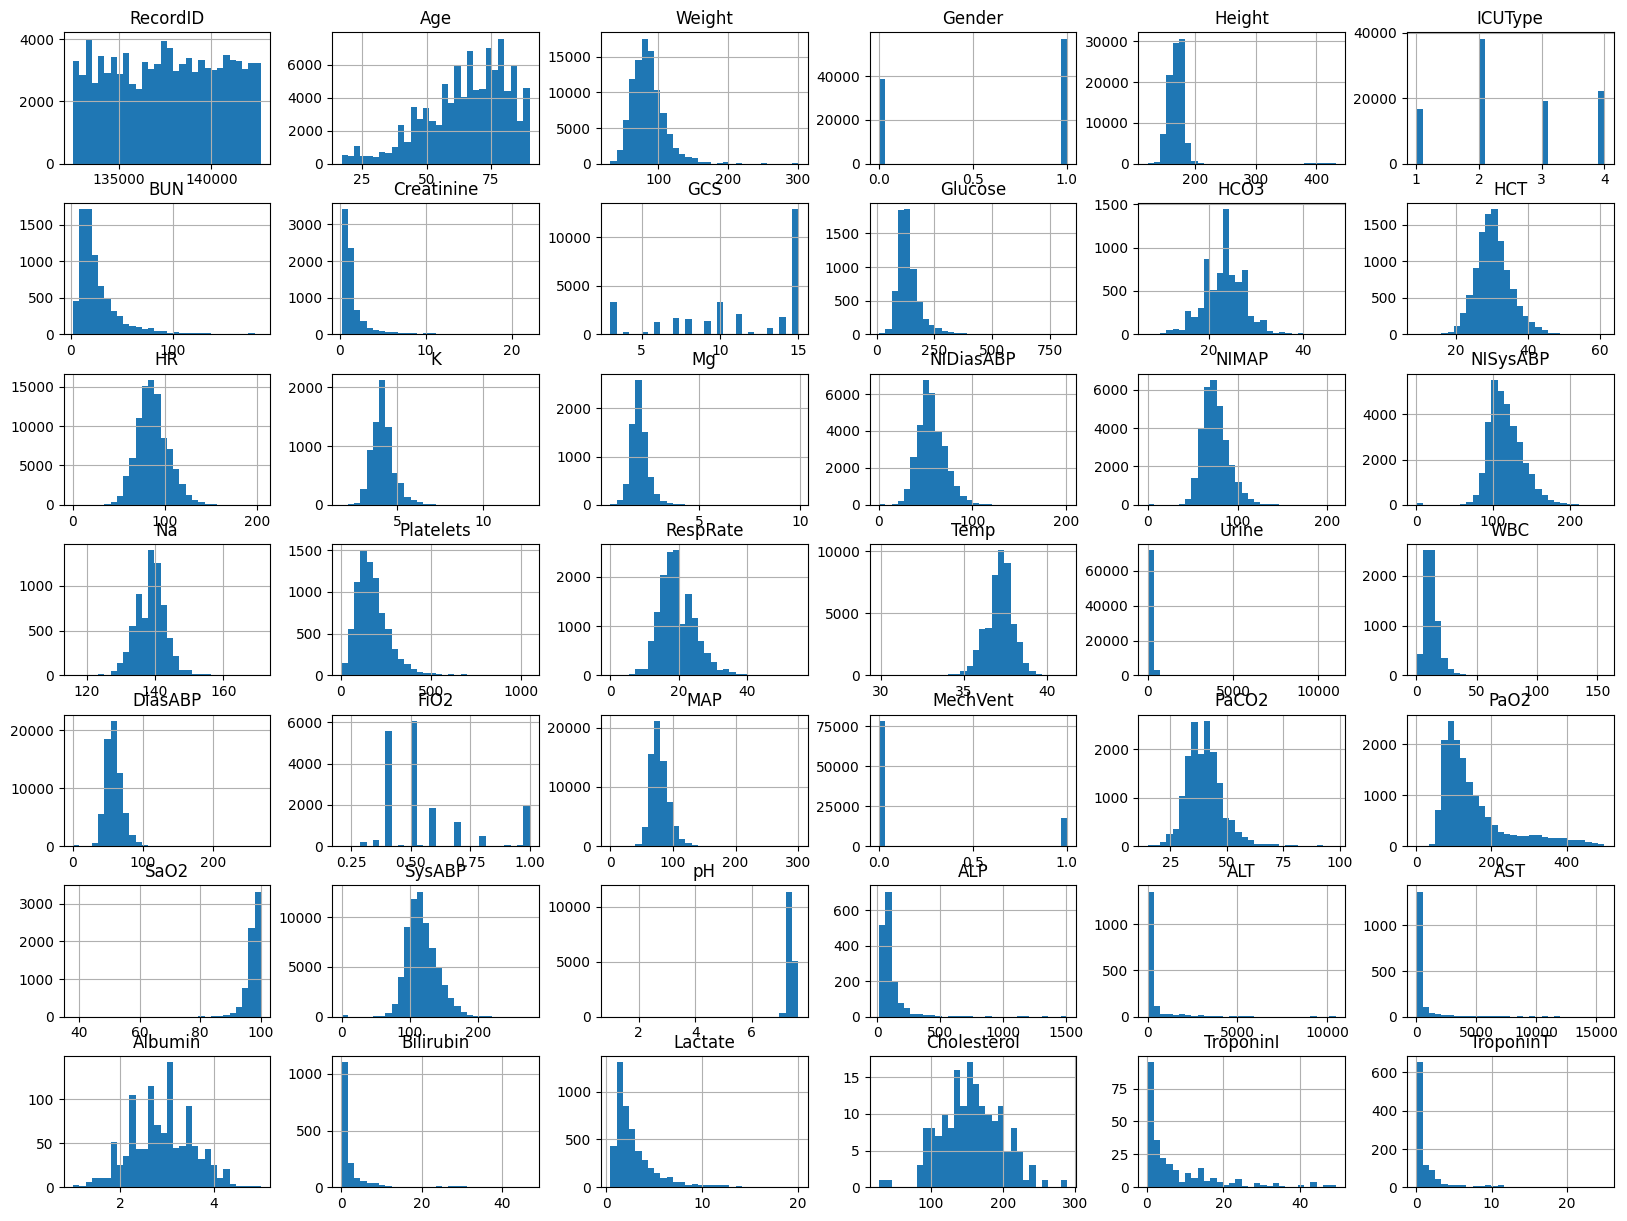

In [42]:
layout = (math.ceil(patient_df.shape[1] / 5), 5)
patient_df.hist(bins=30, figsize=(20, 15))
plt.show()

In [16]:
scaler = StandardScaler()
df_scaled = patient_df_filled.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled

Parameter                  Time       Age    Weight    Gender    Height  \
RecordID                                                                  
132540.0 47     0 days 01:00:00  0.658337 -0.172048  0.822466  0.287284   
         48     0 days 02:00:00  0.658337 -0.172048  0.822466  0.287284   
         49     0 days 03:00:00  0.658337 -0.172048  0.822466  0.287284   
         50     0 days 04:00:00  0.658337 -0.172048  0.822466  0.287284   
         51     0 days 05:00:00  0.658337 -0.172048  0.822466  0.287284   
...                         ...       ...       ...       ...       ...   
142673.0 179501 1 days 20:00:00  0.784172  0.073308 -1.215855 -0.759762   
         179502 1 days 21:00:00  0.784172  0.073308 -1.215855 -0.759762   
         179503 1 days 22:00:00  0.784172  0.073308 -1.215855 -0.759762   
         179504 1 days 23:00:00  0.784172  0.073308 -1.215855 -0.759762   
         179505 2 days 00:00:00  0.784172  0.073308 -1.215855 -0.759762   

Parameter        ICUType       BUN  Creatinine       GCS   Glucose  ...  \
RecordID                                                            ...   
132540.0 47          2.0 -0.279346   -0.253583  0.592539 -0.166738  ...   
         48          2.0 -0.279346   -0.253583 -2.087130 -0.166738  ...   
         49          2.0 -0.441292   -0.398958 -2.087130 -0.166738  ...   
         50          2.0 -0.441292   -0.398958 -0.381886 -0.166738  ...   
         51          2.0 -0.441292   -0.398958 -0.138280 -0.166738  ...   
...                  ...       ...         ...       ...       ...  ...   
142673.0 179501      4.0 -0.009436    0.109854 -0.138280 -0.166738  ...   
         179502      4.0 -0.009436    0.109854  0.836145 -0.166738  ...   
         179503      4.0 -0.009436    0.109854  0.592539 -0.166738  ...   
         179504      4.0 -0.009436    0.109854  0.592539 -0.166738  ...   
         179505      4.0 -0.009436    0.109854  0.592539 -0.166738  ...   

Parameter              pH       ALP       ALT       AST   Albumin  Bilirubin  \
RecordID                                                                       
132540.0 47      0.721206 -0.115865 -0.128324 -0.120677  0.019680  -0.155200   
         48      0.606061 -0.115865 -0.128324 -0.120677  0.019680  -0.155200   
         49      0.606061 -0.115865 -0.128324 -0.120677  0.019680  -0.155200   
         50      0.145480 -0.115865 -0.128324 -0.120677  0.019680  -0.155200   
         51     -0.545391 -0.115865 -0.128324 -0.120677  0.019680  -0.155200   
...                   ...       ...       ...       ...       ...        ...   
142673.0 179501 -0.545391 -0.753637 -0.198520 -0.037082 -2.290205  -0.231398   
         179502 -0.545391 -0.753637 -0.198520 -0.037082 -2.290205  -0.231398   
         179503 -0.890826 -0.753637 -0.198520 -0.037082 -2.290205  -0.231398   
         179504 -0.890826 -0.753637 -0.198520 -0.037082 -2.290205  -0.231398   
         179505 -0.890826 -0.753637 -0.198520 -0.037082 -2.290205  -0.231398   

Parameter        Lactate  Cholesterol  TroponinI  TroponinT  
RecordID                                                     
132540.0 47      -0.1983    -0.002228   -0.09162   -0.15584  
         48      -0.1983    -0.002228   -0.09162   -0.15584  
         49      -0.1983    -0.002228   -0.09162   -0.15584  
         50      -0.1983    -0.002228   -0.09162   -0.15584  
         51      -0.1983    -0.002228   -0.09162   -0.15584  
...                  ...          ...        ...        ...  
142673.0 179501  -0.1983    -0.002228   -0.09162   -0.15584  
         179502  -0.1983    -0.002228   -0.09162   -0.15584  
         179503  -0.1983    -0.002228   -0.09162   -0.15584  
         179504  -0.1983    -0.002228   -0.09162   -0.15584  
         179505  -0.1983    -0.002228   -0.09162   -0.15584  

[95836 rows x 42 columns]

Just used standard scaling to normalise the distribution, since most of the distributions were a normal distribution. An option would be to apply log transformation to the distributions that are tail heavy


In [ ]:
df_scaled.to_parquet('df_scaled_processed.parquet')

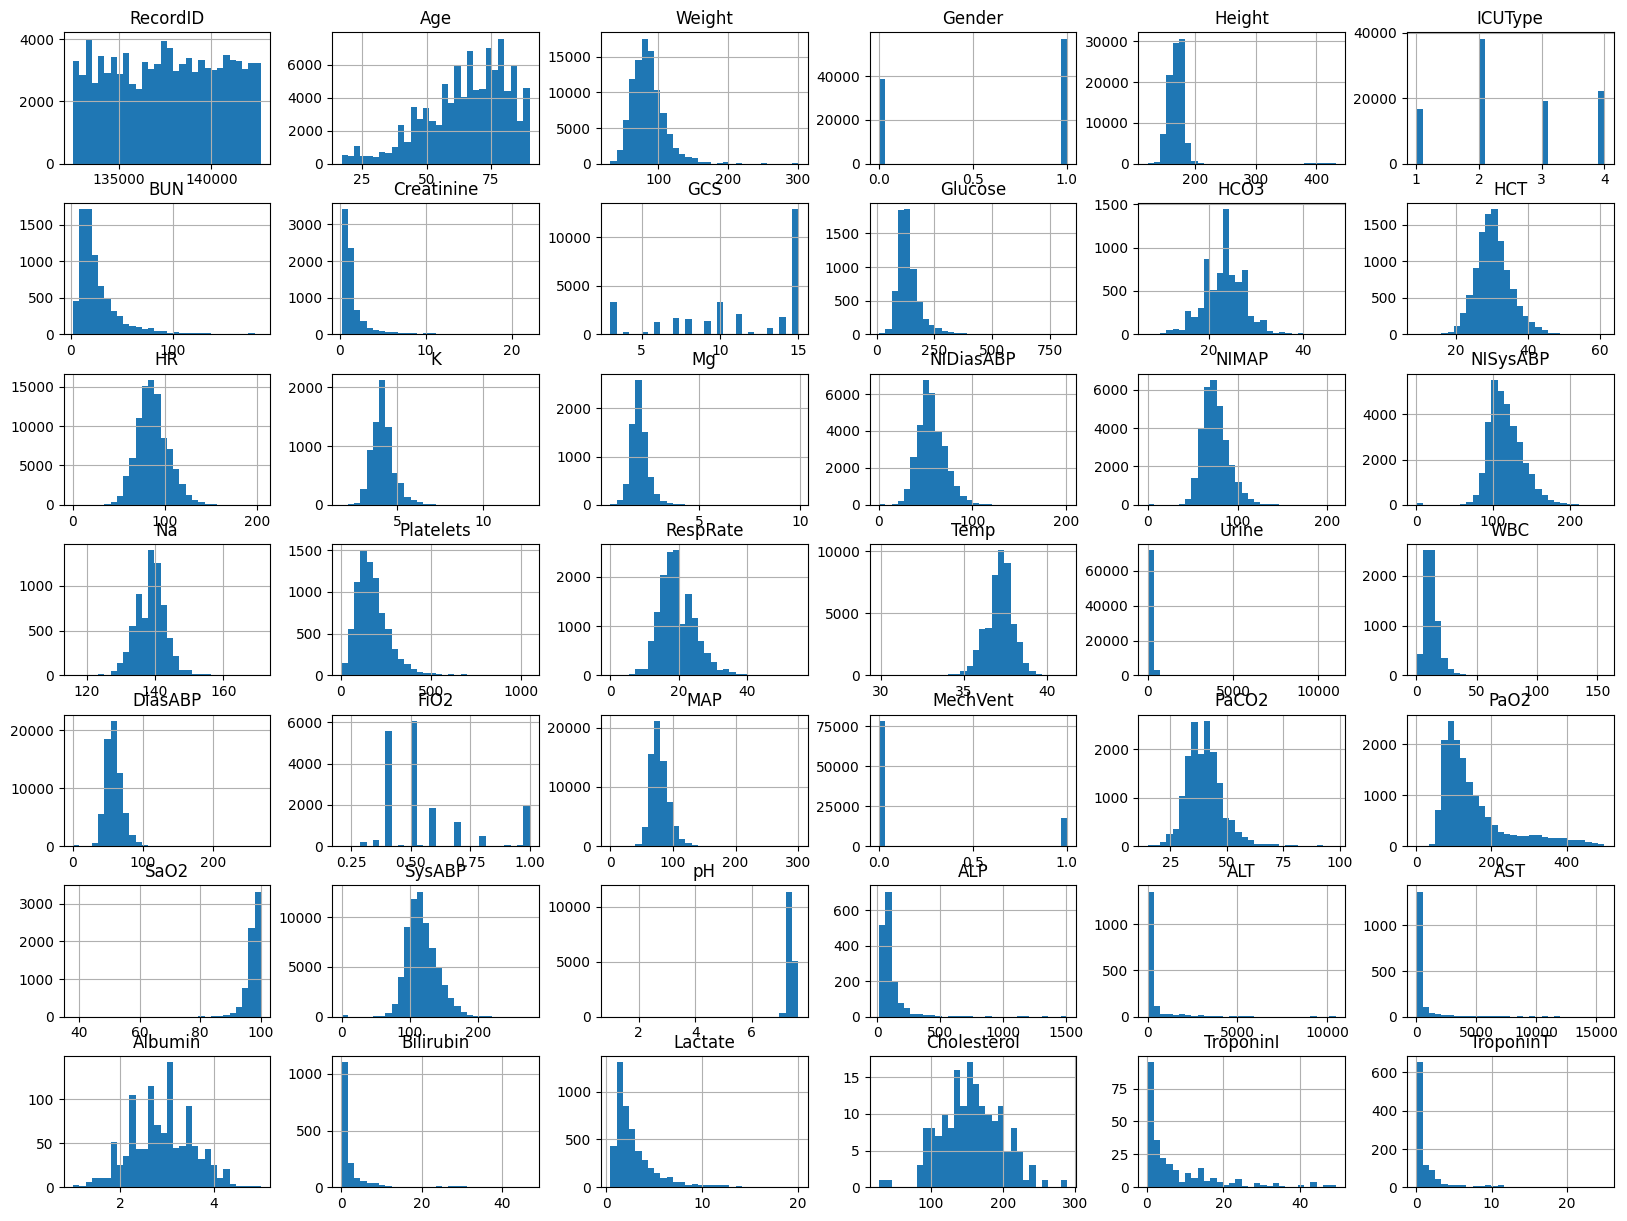

# 2 Supervised Learning

## 2.1

In [22]:
last_values = patient_df_filled.groupby('RecordID').last()
last_values

,Time,Age,Weight,Gender,Height,ICUType,BUN,Creatinine,GCS,Glucose,...,pH,ALP,ALT,AST,Albumin,Bilirubin,Lactate,Cholesterol,TroponinI,TroponinT
RecordID,,,,,,,,,,,,,,,,,,,,,
132539.0,2 days 00:00:00,54.0,-1.0,0.0,-1.0,4.0,8.0,0.7,15.0,115.0,...,7.39,80.0,31.0,46.0,3.0,0.7,1.7,155.0,2.0,0.14
132540.0,2 days 00:00:00,76.0,81.6,1.0,175.3,2.0,21.0,1.3,15.0,146.0,...,7.37,80.0,31.0,46.0,3.0,0.7,1.7,155.0,2.0,0.14
132541.0,2 days 00:00:00,44.0,56.7,0.0,-1.0,3.0,3.0,0.3,5.0,143.0,...,7.47,105.0,75.0,164.0,2.3,2.8,0.9,155.0,2.0,0.14
132543.0,2 days 00:00:00,68.0,84.6,1.0,180.3,3.0,10.0,0.7,15.0,117.0,...,7.39,105.0,12.0,15.0,4.4,0.2,1.7,155.0,2.0,0.14
132545.0,2 days 00:00:00,88.0,-1.0,0.0,-1.0,3.0,25.0,1.0,15.0,92.0,...,7.39,80.0,31.0,46.0,3.3,0.7,1.7,155.0,2.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142665.0,2 days 00:00:00,70.0,87.0,0.0,-1.0,4.0,18.0,1.0,15.0,106.0,...,7.39,80.0,31.0,46.0,3.0,0.7,1.1,155.0,2.0,0.14
142667.0,2 days 00:00:00,25.0,166.4,1.0,-1.0,3.0,7.0,0.7,15.0,88.0,...,7.39,80.0,31.0,46.0,3.0,0.7,1.7,117.0,2.0,0.14
142670.0,2 days 00:00:00,44.0,109.0,1.0,-1.0,3.0,6.0,1.0,5.0,132.0,...,7.41,51.0,20.0,20.0,3.0,0.5,1.7,155.0,2.0,0.14


In [23]:
last_values['Time'].unique()

array(['2 days 00:00:00', '1 days 23:00:00', '1 days 21:00:00',
       '1 days 19:00:00', '1 days 22:00:00', '1 days 07:00:00',
       '1 days 15:00:00', '1 days 09:00:00', '1 days 20:00:00',
       '0 days 05:00:00', '1 days 12:00:00', '1 days 11:00:00',
       '1 days 16:00:00', '1 days 18:00:00', '1 days 10:00:00',
       '1 days 14:00:00', '1 days 02:00:00', '1 days 17:00:00',
       '0 days 19:00:00', '1 days 01:00:00', '0 days 10:00:00',
       '1 days 05:00:00', '0 days 06:00:00', '0 days 13:00:00',
       '0 days 16:00:00', '1 days 06:00:00', '1 days 03:00:00',
       '0 days 09:00:00', '1 days 13:00:00'], dtype=object)

In [3]:
pd.read_parquet(os.path.join('loaded_data', 'a_patient_data_processed.parquet')).drop(columns=['level_1'])

Parameter,RecordID,Time,Age,Weight,Gender,Height,ICUType,BUN,Creatinine,GCS,...,pH,ALP,ALT,AST,Albumin,Bilirubin,Lactate,Cholesterol,TroponinI,TroponinT
0,132539.0,0 days 01:00:00,-0.596605,-2.588766,-1.128815,-1.061398,1.233641,-0.292447,-0.308919,0.836113,...,-0.013690,-0.138807,-0.123519,-0.118460,0.009375,-0.160862,-0.195203,-0.01868,-0.08847,-0.146278
1,132539.0,0 days 02:00:00,-0.596605,-2.588766,-1.128815,-1.061398,1.233641,-0.292447,-0.308919,0.836113,...,-0.013690,-0.138807,-0.123519,-0.118460,0.009375,-0.160862,-0.195203,-0.01868,-0.08847,-0.146278
2,132539.0,0 days 03:00:00,-0.596605,-2.588766,-1.128815,-1.061398,1.233641,-0.292447,-0.308919,0.836113,...,-0.013690,-0.138807,-0.123519,-0.118460,0.009375,-0.160862,-0.195203,-0.01868,-0.08847,-0.146278
3,132539.0,0 days 04:00:00,-0.596605,-2.588766,-1.128815,-1.061398,1.233641,-0.292447,-0.308919,0.836113,...,-0.013690,-0.138807,-0.123519,-0.118460,0.009375,-0.160862,-0.195203,-0.01868,-0.08847,-0.146278
4,132539.0,0 days 05:00:00,-0.596605,-2.588766,-1.128815,-1.061398,1.233641,-0.292447,-0.308919,0.836113,...,-0.013690,-0.138807,-0.123519,-0.118460,0.009375,-0.160862,-0.195203,-0.01868,-0.08847,-0.146278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179501,142673.0,1 days 20:00:00,0.781907,0.292499,-1.128815,0.771789,1.233641,-0.044257,0.128413,-0.187795,...,-0.022018,-0.717582,-0.172539,-0.035129,-2.180856,-0.230635,-0.114322,-0.01868,-0.08847,-0.146278
179502,142673.0,1 days 21:00:00,0.781907,0.292499,-1.128815,0.771789,1.233641,-0.044257,0.128413,0.836113,...,-0.022018,-0.717582,-0.172539,-0.035129,-2.180856,-0.230635,-0.114322,-0.01868,-0.08847,-0.146278
179503,142673.0,1 days 22:00:00,0.781907,0.292499,-1.128815,0.771789,1.233641,-0.044257,0.128413,0.580136,...,-0.027015,-0.717582,-0.172539,-0.035129,-2.180856,-0.230635,-0.114322,-0.01868,-0.08847,-0.146278
179504,142673.0,1 days 23:00:00,0.781907,0.292499,-1.128815,0.771789,1.233641,-0.044257,0.128413,0.580136,...,-0.027015,-0.717582,-0.172539,-0.035129,-2.180856,-0.230635,-0.114322,-0.01868,-0.08847,-0.146278


NameError: name 'numeric_cols' is not defined